<a href="https://colab.research.google.com/github/NeoRedcraft/nlp-project-1/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1: Introduction to the Problem

# Section 2: Dataset Description

## Section 2.1: Brief Description

[Provide a brief description of the knowledge sources used (e.g., PDFs, web pages, text
files, databases).]

## Section 2.2: Source of Documents

[State the source of the documents and how they were collected. ]

## Section 2.3: Dataset Structure

[Explain the dataset structure (number of documents, file types, size, domains).]

In [1]:
# Clone the GitHub repository
!git clone https://github.com/NeoRedcraft/nlp-project-1

Cloning into 'nlp-project-1'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 67 (delta 22), reused 35 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (67/67), 1.35 MiB | 23.92 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [2]:
%cd nlp-project-1

/content/nlp-project-1


/tmp/ipython-input-3456169558.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tfidf_sum.values, y=tfidf_sum.index, palette='viridis')


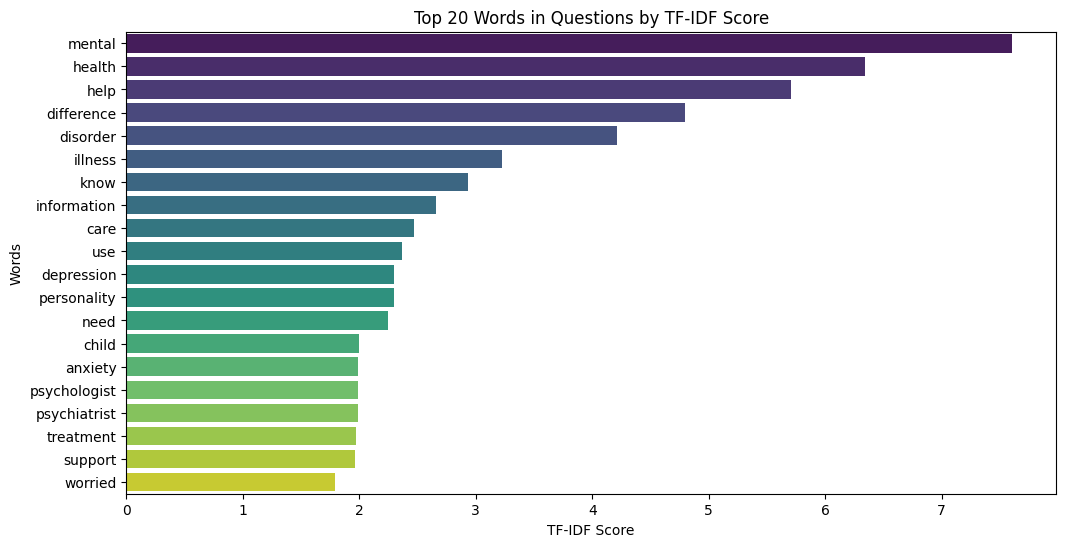

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
file_path = '/content/nlp-project-1/dataset/Mental_Health_FAQ.csv' # Changed path to reflect common Colab upload location
df = pd.read_csv(file_path)

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['Questions'].dropna())

# Get feature names and sum TF-IDF scores
feature_names = vectorizer.get_feature_names_out()
dense = tfidf_matrix.todense()
denselist = dense.tolist()
df_tfidf = pd.DataFrame(denselist, columns=feature_names)
top_n = 20
tfidf_sum = df_tfidf.sum().sort_values(ascending=False).head(top_n)

# Plot TF-IDF Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x=tfidf_sum.values, y=tfidf_sum.index, palette='viridis')
plt.title(f'Top {top_n} Words in Questions by TF-IDF Score')
plt.xlabel('TF-IDF Score')
plt.ylabel('Words')
plt.show()

## Section 2.4: Preprocessing

[Discuss any preprocessing steps applied (cleaning, chunking strategy, token limits,
metadata tagging, document filtering)]

In [3]:
# Install dependencies from requirements and ensure critical packages are upgraded
!pip install -q -r requirements.txt
!pip install -q -U bitsandbytes accelerate transformers huggingface_hub langchain langchain-community langchain-huggingface bs4 sentence-transformers
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.8/93.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 98.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 117.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.4/566.4 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 110.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/13

In [4]:
# RAG Preprocessing for Qwen/Qwen1.5-7B Model
import pandas as pd
from langchain_community.document_loaders import DataFrameLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter # Updated import path
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_community.vectorstores import Chroma
from langchain_core.documents import Document # Updated import path
import os

def main():
    # 1. Load Data
    # Ensure the path is correct relative to where you run this script
    file_path = '/content/nlp-project-1/dataset/Mental_Health_FAQ.csv' # Updated path to refer to the cloned GitHub repo
    if not os.path.exists(file_path):
        print(f"Error: File not found at {file_path}")
        return

    print("Loading data...")
    df = pd.read_csv(file_path)

    # Create a new column that combines Question and Answer for the embedding content
    # This ensures the retrieval system finds relevant answers based on query similarity
    # to both the question and the answer content.
    df['combined_content'] = 'Question: ' + df['Questions'] + '\nAnswer: ' + df['Answers']

    # 2. Create LangChain Documents
    print("Creating documents...")
    documents = []
    for index, row in df.iterrows():
        # strict handling of potential NaN values
        content = str(row['combined_content']) if pd.notna(row['combined_content']) else ""
        doc = Document(
            page_content=content,
            metadata={'Question_ID': row['Question_ID']}
        )
        documents.append(doc)

    # 3. Text Splitting
    # Splitting might be needed if some answers are very long.
    print("Splitting text...")
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
    splits = text_splitter.split_documents(documents)

    # 4. Embedding Model (Preparing for Qwen Retrieval)
    # sentences-transformers/all-MiniLM-L6-v2 is a good general purpose embedding model
    print("Initializing embedding model...")
    embedding_model_name = 'sentence-transformers/all-MiniLM-L6-v2'
    embeddings = HuggingFaceEmbeddings(model_name=embedding_model_name)

    # 5. Vector Store Creation
    persist_directory = './chroma_db'
    print(f"Creating vector store at {persist_directory}...")

    # Optional: Clear existing DB to avoid duplicates if running multiple times
    # import shutil
    # if os.path.exists(persist_directory):
    #     shutil.rmtree(persist_directory)

    vectorstore = Chroma.from_documents(
        documents=splits,
        embedding=embeddings,
        persist_directory=persist_directory
    )

    print(f"Vector store created successfully at {persist_directory} with {len(splits)} documents.")

if __name__ == "__main__":
    main()

Loading data...
Creating documents...
Splitting text...
Initializing embedding model...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Creating vector store at ./chroma_db...
Vector store created successfully at ./chroma_db with 244 documents.


In [6]:
import os
from google.colab import files

# Define the path to the chroma_db folder
chroma_db_path = './chroma_db'
zip_file_name = 'chroma_db.zip'

# Ensure we are in the base content directory before zipping
# The chroma_db is created in the current working directory, which should be /content/nlp-project-1.
# If you need to access it from /content, you might need to adjust paths or chdir.
# For now, assuming current directory has chroma_db.

# Compress the chroma_db folder
if os.path.exists(chroma_db_path):
    # Using -r for recursive, -q for quiet (no output)
    !zip -r -q {zip_file_name} {chroma_db_path}
    print(f"'{chroma_db_path}' successfully zipped as '{zip_file_name}'.")

    # Download the zip file
    files.download(zip_file_name)
    print(f"'{zip_file_name}' download initiated.")
else:
    print(f"Error: The folder '{chroma_db_path}' does not exist. Please ensure it has been created successfully.")


'./chroma_db' successfully zipped as 'chroma_db.zip'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'chroma_db.zip' download initiated.


In [5]:
import os
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline, BitsAndBytesConfig # Import BitsAndBytesConfig
from langchain_huggingface.llms import HuggingFacePipeline
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_community.vectorstores import Chroma
# The original import was from langchain_classic.chains, but RetrievalQA is typically from langchain.chains
from langchain.chains import RetrievalQA # Corrected import for RetrievalQA


# 1. Define the Qwen model ID
model_id = "Qwen/Qwen1.5-7B-Chat"

# 2. Load Tokenizer and Model (with quantization for memory efficiency)
print(f"Loading tokenizer and model for {model_id}...")
tokenizer = AutoTokenizer.from_pretrained(model_id)

# Define quantization configuration using BitsAndBytesConfig
# This addresses the warning and potential compatibility issues with load_in_4bit
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16 if torch.cuda.is_available() and torch.cuda.get_device_capability()[0] >= 8 else torch.float16,
)

model = AutoModelForCausalLM.from_pretrained(
    model_id,
    quantization_config=bnb_config, # Pass the quantization_config object
    device_map="auto", # Automatically maps model layers to available devices (CPU/GPU)
    # The torch_dtype here will apply to non-quantized parts or if 4-bit is not used.
    # For 4-bit, bnb_4bit_compute_dtype is more relevant.
    torch_dtype=torch.bfloat16 if torch.cuda.is_available() and torch.cuda.get_device_capability()[0] >= 8 else torch.float16,
)

# 3. Create a Hugging Face text generation pipeline
print("Creating Hugging Face text generation pipeline...")
hf_pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=512, # Maximum number of tokens to generate
    do_sample=True,     # Use sampling for generation
    temperature=0.7,    # Sampling temperature
    top_k=50,           # Top-k sampling
    top_p=0.95,         # Top-p (nucleus) sampling
)

# 4. Initialize HuggingFacePipeline for LangChain
llm = HuggingFacePipeline(pipeline=hf_pipeline)
print("HuggingFace LLM initialized for LangChain.")

# 5. Load the embedding model (same as used for Chroma DB creation)
print("Initializing embedding model...")
embedding_model_name = 'sentence-transformers/all-MiniLM-L6-v2'
embeddings = HuggingFaceEmbeddings(model_name=embedding_model_name)

# 6. Load the Chroma vector store
persist_directory = './chroma_db'
print(f"Loading Chroma vector store from {persist_directory}...")
vectorstore = Chroma(persist_directory=persist_directory, embedding_function=embeddings)

# 7. Create a retriever from the vector store
retriever = vectorstore.as_retriever(search_kwargs={"k": 3}) # Retrieve top 3 relevant documents
print("Retriever created.")

# 8. Set up the RAG chain using RetrievalQA
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff", # "stuff" combines all documents into one prompt
    retriever=retriever,
    return_source_documents=True
)
print("RetrievalQA chain initialized with Qwen1.5-7B and Chroma DB.")

print("RAG system is ready. You can now use 'qa_chain.invoke({'query': 'Your question here'})' to query the system.")

Loading tokenizer and model for Qwen/Qwen1.5-7B-Chat...


config.json:   0%|          | 0.00/663 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/387 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/243 [00:00<?, ?B/s]

Passing `generation_config` together with generation-related arguments=({'max_new_tokens', 'temperature', 'do_sample', 'top_k', 'top_p'}) is deprecated and will be removed in future versions. Please pass either a `generation_config` object OR all generation parameters explicitly, but not both.


Creating Hugging Face text generation pipeline...
HuggingFace LLM initialized for LangChain.
Initializing embedding model...


Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Loading Chroma vector store from ./chroma_db...
Retriever created.
RetrievalQA chain initialized with Qwen1.5-7B and Chroma DB.
RAG system is ready. You can now use 'qa_chain.invoke({'query': 'Your question here'})' to query the system.


/tmp/ipython-input-2683859429.py:61: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(persist_directory=persist_directory, embedding_function=embeddings)


In [10]:
qa_chain.invoke({'query': 'What kind of questions you can answer'})

Both `max_new_tokens` (=512) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


{'query': 'What kind of questions you can answer',
 'result': "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\nQuestion: How do I deal with someone telling me what to do?\nAnswer: Some people may advise you on good evidence of what works with the best of intentions, but it's important to find out what works best for you.\n\nQuestion: What are the different types of mental health professionals?\nAnswer: There are many types of mental health professionals. Finding the right one for you may require some research.\n\nQuestion: How can I tell if health information is good or bad?\nAnswer: Anyone can post anything online. It's up to the readers to think critically about information to decide if it seems helpful, truthful, or safe. Here are key points to keep in mind as you determine which information is worth considering and which information doesn't pass the test. \n It's so

In [11]:
qa_chain.invoke({'query': 'What is mental health'})

Both `max_new_tokens` (=512) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


{'query': 'What is mental health',
 'result': "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer.\n\nQuestion: What is mental health?\nAnswer: We all have mental health which is made up of our beliefs, thoughts, feelings and behaviours.\n\nA mental illness is an illness the affects that way people think, feel, behave, or interact with others. There are many different mental illnesses, and they have different symptoms that impact peoples’ lives in different ways. \n Health isn’t like an on/off switch. There are different degrees of health. People move on a continuum ranging from great or good health to so-so health to poor health to illness or disability. For example, some people have good health and have no problems going about their lives. Some people experience serious health problems, and their poor health has a very negative impact on their life. Some people have serious 